In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'baseline_0.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:

bundleList = []
metric = metrics.PairFractionMetric(minGap=2.1*60.*24., maxGap=3.2*60.*24)
slicer = slicers.HealpixSlicer()
sql = 'filter = "g" or filter="i" or filter="r"'
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint filter = "g" or filter="i" or filter="r" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 8146 visits
Running:  ['opsim_PairFraction_g_or_i_or_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "g" or filter="i" or filter="r"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.240436  dipole: lon: -143.023, lat: 22.7959, amp: 0.145735
Plotting complete.


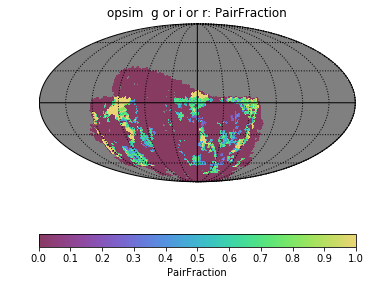

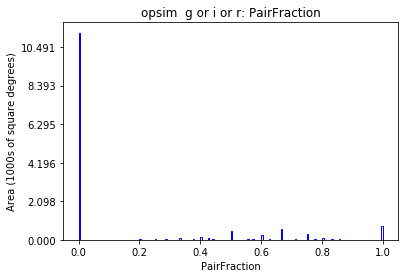

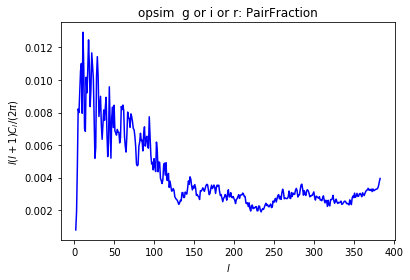

In [4]:


bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)

Querying database SummaryAllProps with constraint filter = "g" or filter="i" or filter="r" for columns ['observationStartMJD', 'fieldRA', 'fieldDec']
Found 7205 visits
Running:  ['opsim_PairFraction_g_or_i_or_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "g" or filter="i" or filter="r"" constraint now.
monopole: 0.253418  dipole: lon: -9.57469, lat: -50.1992, amp: 0.443594
Plotting complete.


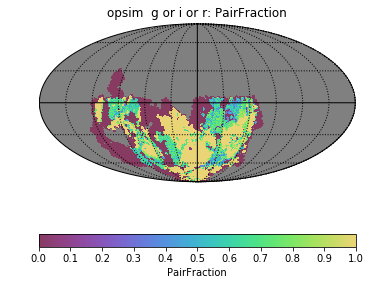

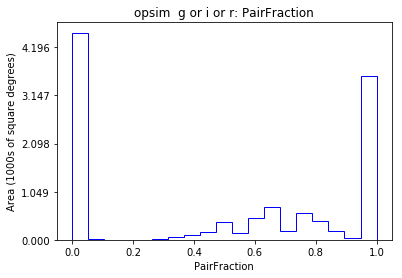

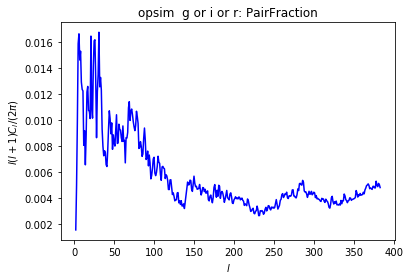

In [5]:
dbFile = 'cadence_0.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)

bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)